# Drops of Jupyter

1. Pandas + Shapely: A standard data model
2. Static Maps

In [96]:
%matplotlib inline
import os

## Pandas + Shapely: A standard data model

In [2]:
import geopandas as gpd

### Read a file

In [3]:
parks_gdf = gpd.read_file('https://opendata.arcgis.com/datasets/43b5d6bf9d6e400599498d052545d331_0.geojson')

### View the data frame

In [4]:
parks_gdf.head()

OBJECTID                           NAME     PARK_TYPE FILE_NUMBER  \
0         1           Windemere Beaver Dam  Neighborhood        N-27   
1         2  Walnut Creek Athletic Complex         Metro     METRO-6   
2         3         Thornton Road Property     Community        C-17   
3         4                Mary Belle Pate  Neighborhood        N-44   
4         5                     Eliza Pool  Neighborhood        N-31   

   PARCEL_COUNT    DEVELOPED   MAP_ACRES               ADDRESS  ZIP_CODE  \
0             2    Developed   14.767369    1500 Nottingham Rd     27607   
1             9    Developed  104.843799    1201 Sunnybrook Rd     27610   
2             2  Undeveloped  130.609432      5600 Thornton Rd     27616   
3             1    Developed    2.447495       2640 Sierra Dr      27603   
4             2    Developed    6.244034  1600 Fayetteville St     27603   

  ALTERNATE_ADDRESS LWCF  PARKID INITIAL_AQUISITION_DATE   Shape__Area  \
0                NA  Yes      34     1950-01-01T00:00:00  6.432640e+05   
1                NA   No      35     1955-01-01T00:00:00  4.566978e+06   
2  6100 Thornton Rd   No       1     1998-10-07T00:00:00  5.689324e+06   
3                NA   No       2     2009-08-31T00:00:00  1.066124e+05   
4                NA   No       3     1996-02-29T00:00:00  2.719890e+05   

   Shape__Length                                           geometry  
0   11375.221313  MULTIPOLYGON (((-78.67111 35.81289, -78.67110 ...  
1   11257.400109  MULTIPOLYGON (((-78.57502 35.76376, -78.57520 ...  
2   13130.109125  POLYGON ((-78.53733 35.90189, -78.53573 35.902...  
3    1412.464218  POLYGON ((-78.67968 35.75253, -78.67975 35.752...  
4    2738.523454  MULTIPOLYGON (((-78.64269 35.75848, -78.64259 ...

### Get information about the dataset

#### Fields

In [5]:
parks_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 16 columns):
OBJECTID                   204 non-null int64
NAME                       204 non-null object
PARK_TYPE                  204 non-null object
FILE_NUMBER                204 non-null object
PARCEL_COUNT               204 non-null int64
DEVELOPED                  204 non-null object
MAP_ACRES                  204 non-null float64
ADDRESS                    204 non-null object
ZIP_CODE                   204 non-null int64
ALTERNATE_ADDRESS          202 non-null object
LWCF                       204 non-null object
PARKID                     204 non-null int64
INITIAL_AQUISITION_DATE    158 non-null object
Shape__Area                204 non-null float64
Shape__Length              204 non-null float64
geometry                   204 non-null geometry
dtypes: float64(3), geometry(1), int64(4), object(8)
memory usage: 25.6+ KB


#### Summay Statistics

In [6]:
parks_gdf.describe()

OBJECTID  PARCEL_COUNT   MAP_ACRES      ZIP_CODE      PARKID  \
count  204.000000    204.000000  204.000000    204.000000  204.000000   
mean   102.671569      2.078431   30.753230  27606.867647  102.848039   
std     59.351628      2.458268   89.831589      5.444492   59.428489   
min      1.000000      0.000000    0.000000  27587.000000    1.000000   
25%     51.750000      1.000000    0.719289  27604.000000   51.750000   
50%    102.500000      1.000000    3.742625  27608.000000  102.500000   
75%    153.250000      2.000000   23.643565  27610.000000  154.250000   
max    225.000000     19.000000  873.922419  27617.000000  205.000000   

        Shape__Area  Shape__Length  
count  2.040000e+02     204.000000  
mean   1.343743e+06    4548.261181  
std    3.915312e+06    7813.330810  
min    2.306285e+03     227.175495  
25%    3.403733e+04     842.343073  
50%    1.749643e+05    2275.482311  
75%    1.029931e+06    5154.958092  
max    3.806806e+07   72748.002981

In [7]:
parks_gdf['DEVELOPED'].value_counts()

Developed      125
Undeveloped     79
Name: DEVELOPED, dtype: int64

#### CRS

In [8]:
parks_gdf.crs

{'init': 'epsg:4326'}

#### Plot geometries

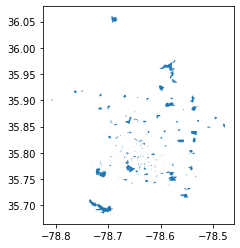

In [9]:
parks_gdf.plot()

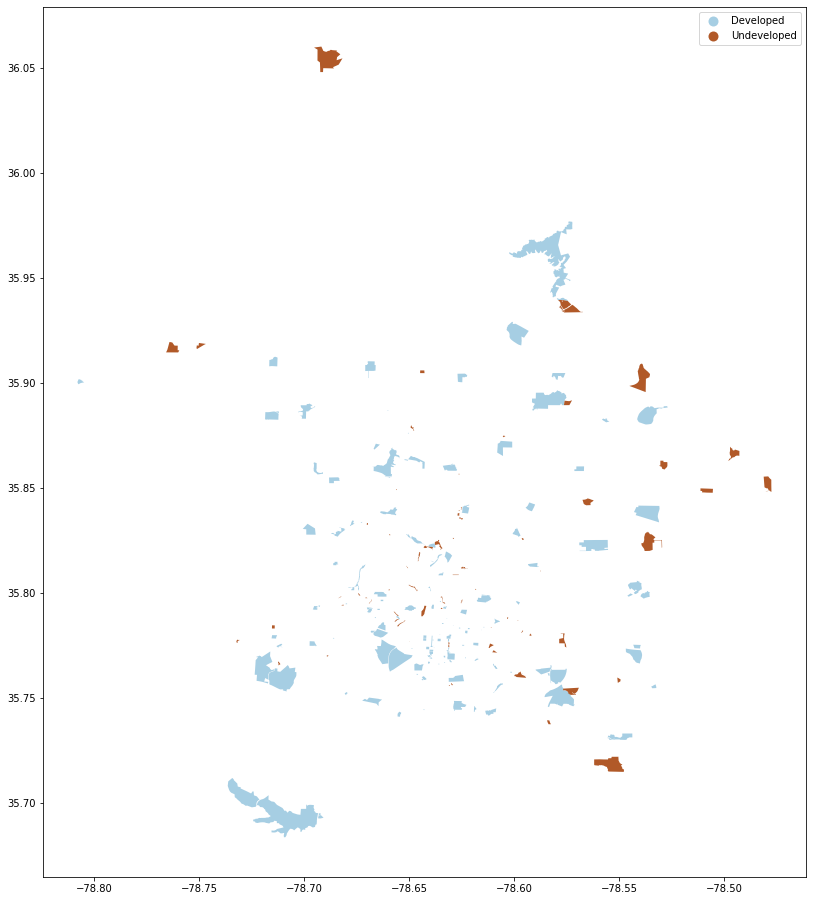

In [10]:
parks_gdf.plot(column = 'DEVELOPED', cmap = 'Paired', figsize = (16, 16), legend = True)

#### Shapely Geometry

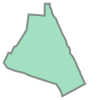

<class 'shapely.geometry.polygon.Polygon'>
Polygon
POLYGON ((-78.5985174997839 35.8303849649124, -78.59855267213651 35.8304353897078, -78.5985626375807 35.830466673641, -78.5985690581245 35.830532455343, -78.598586471695 35.8305924370937, -78.59860478152861 35.8306417779179, -78.5986164031039 35.830679248658, -78.5986465860701 35.8307154050716, -78.5986649607572 35.8307516956581, -78.5986672121759 35.8308078517784, -78.598663679224 35.8308399466257, -78.59865922454399 35.8308871484294, -78.59889960350139 35.8308860558031, -78.59890570830279 35.8306755644306, -78.5989099168039 35.8303366345614, -78.59912321584891 35.8303538171135, -78.59934915621049 35.8303720746726, -78.5996476093688 35.830394517833, -78.59965284654849 35.8303588205034, -78.5996842967381 35.8301391420574, -78.5997149849986 35.8299029765525, -78.5997456220683 35.8296771140251, -78.5998757118501 35.8294647978526, -78.6000091812256 35.8292511216854, -78.60013075719471 35.8290549166034, -78.6001936794972 35.8289521002644, 

In [11]:
park_geometry = parks_gdf.loc[parks_gdf[parks_gdf["NAME"] == 'Brentwood'].index[0], 'geometry']
display(park_geometry)
print(type(park_geometry))
print(park_geometry.geom_type)
print(park_geometry)

In [12]:
park_geometry.centroid.x, park_geometry.centroid.y

(-78.59885186698106, 35.82856125957957)

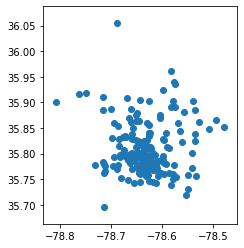

In [13]:
parks_gdf['geometry'] = parks_gdf.apply(lambda x: x['geometry'].centroid, axis = 1)
parks_gdf.plot()

In [14]:
from pyproj import Proj, transform
inProj = Proj(init = 'epsg:4326')
outProj = Proj(init = 'epsg:2264')
x, y = transform(inProj, outProj, park_geometry.centroid.x, park_geometry.centroid.y)
x, y

(645845.4516880455, 230652.6926057209)

## Static Maps

### Example: Citrix Cycle Docks w/ basemap

In [15]:
import requests
from io import BytesIO
import pandas as pd

#### Access Citrix Cycle Docks data feed

In [16]:
cc_docks_r = requests.get('https://citrixcycle.com/stations/stations/')
cc_docks_df = pd.read_json(BytesIO(cc_docks_r.content))
cc_docks_df.head()

code locking_station_type  sponsor  secondary_locked_cycle_count  \
0   NaN             PHYSICAL      NaN                             4   
1   NaN             PHYSICAL      NaN                             0   
2   NaN             PHYSICAL      NaN                             0   
3   NaN             PHYSICAL      NaN                             0   
4   NaN             PHYSICAL      NaN                             0   

                                     id  has_kiosk  \
0  f8730a3b-4160-490a-8b85-02059fa3794a       True   
1  7281d2a7-5dd8-49e8-94ec-5415cc2fc5aa      False   
2  af572482-0095-44b0-8d74-480781aee83c      False   
3  fa9e203d-4de9-4686-8eb3-503246a5e8a9      False   
4  dad24dfb-004c-478a-a627-553519878d36      False   

                                                area  opening_hours  schedule  \
0  {'latitude': 35.77854972512165, 'radius': 0.00...            NaN       NaN   
1  {'latitude': 35.77953042887657, 'radius': 0.00...            NaN       NaN   
2  {'latitude': 35.772090736415386, 'radius': 0.0...            NaN       NaN   
3  {'latitude': 35.78911469763567, 'radius': 0.00...            NaN       NaN   
4  {'latitude': 35.782832183184084, 'radius': 0.0...            NaN       NaN   

                                           area_json  ... cycles_in_station  \
0  {"latitude": 35.77854972512165, "radius": 0.00...  ...                []   
1  {"latitude": 35.77953042887657, "radius": 0.00...  ...                []   
2  {"latitude": 35.772090736415386, "radius": 0.0...  ...                []   
3  {"latitude": 35.78911469763567, "radius": 0.00...  ...                []   
4  {"latitude": 35.782832183184084, "radius": 0.0...  ...                []   

  advertisement               address  free_dockes  has_ccreader  \
0           NaN       201 W Morgan St            5          True   
1           NaN         100 E West St            5         False   
2           NaN          2 E South St            7         False   
3           NaN  2811 Hillsborough St            8         False   
4           NaN         202 N West St            5         False   

                       name  notes  station_type kiosks  max_extra_bikes  
0        Municipal Building    NaN         FIXED    NaN                8  
1            Citrix Station    NaN         FIXED    NaN                5  
2        Duke Energy Center    NaN         FIXED    NaN                5  
3  Hillsborough & Dan Allen    NaN         FIXED    NaN                5  
4              Jones & West    NaN         FIXED    NaN                5  

[5 rows x 39 columns]

#### Inspect the data

In [17]:
cc_docks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 39 columns):
code                            0 non-null float64
locking_station_type            30 non-null object
sponsor                         0 non-null float64
secondary_locked_cycle_count    30 non-null int64
id                              30 non-null object
has_kiosk                       30 non-null bool
area                            30 non-null object
opening_hours                   0 non-null float64
schedule                        0 non-null float64
area_json                       30 non-null object
area_type                       30 non-null object
min_bikes_request_time          0 non-null datetime64[ns]
installation_date               30 non-null object
manage_status                   0 non-null float64
stocking_high                   0 non-null float64
location                        30 non-null object
serial_number                   30 non-null int64
stocking_full              

#### Reduce docks data to columns of interest

In [18]:
cc_docks_reduced_df = cc_docks_df.loc[:,['id', 'locking_station_type', 'description', 'address', 'primary_locked_cycle_count', 'stocking_low', 'total_locked_cycle_count', 'free_spaces', 'location']]

#### Create `geometry` column from `location`

In [19]:
from shapely.geometry import Point

In [20]:
cc_docks_reduced_df['geometry'] = cc_docks_reduced_df.apply(lambda x: Point(x['location'][1],x['location'][0]), axis = 1)
cc_docks_reduced_df.drop(columns=['location'], inplace = True)
cc_docks_reduced_df.head()

id locking_station_type  \
0  f8730a3b-4160-490a-8b85-02059fa3794a             PHYSICAL   
1  7281d2a7-5dd8-49e8-94ec-5415cc2fc5aa             PHYSICAL   
2  af572482-0095-44b0-8d74-480781aee83c             PHYSICAL   
3  fa9e203d-4de9-4686-8eb3-503246a5e8a9             PHYSICAL   
4  dad24dfb-004c-478a-a627-553519878d36             PHYSICAL   

                           description               address  \
0                   Municipal Building       201 W Morgan St   
1  Citrix Station (W Morgan at S West)         100 E West St   
2                   Duke Energy Center          2 E South St   
3  Hillsborough & Dan Allen (Stanhope)  2811 Hillsborough St   
4     Jones & West (N West at W Jones)         202 N West St   

   primary_locked_cycle_count  stocking_low  total_locked_cycle_count  \
0                           3             1                         7   
1                           8             2                         8   
2                          12             3                        12   
3                           8             3                         8   
4                           8             2                         8   

   free_spaces                                      geometry  
0            4  POINT (-78.64312292753584 35.77854972512165)  
1            5  POINT (-78.64604086169889 35.77953042887657)  
2            5  POINT (-78.63970826815405 35.77209073641539)  
3            5   POINT (-78.6746170655547 35.78911469763567)  
4            5  POINT (-78.64573979410267 35.78283218318409)

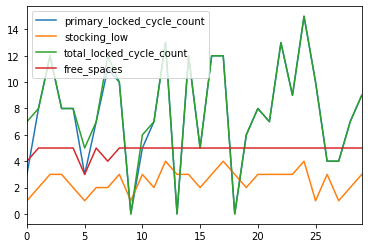

In [21]:
cc_docks_reduced_df.plot()

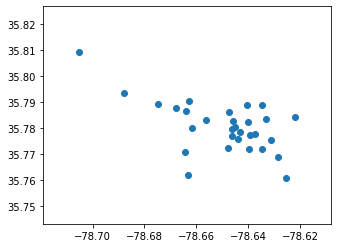

In [22]:
cc_docks_reduced_gdf = gpd.GeoDataFrame(cc_docks_reduced_df, geometry = 'geometry', crs={'init': 'epsg:4326'})
cc_docks_reduced_gdf.plot()

In [23]:
import contextily as ctx

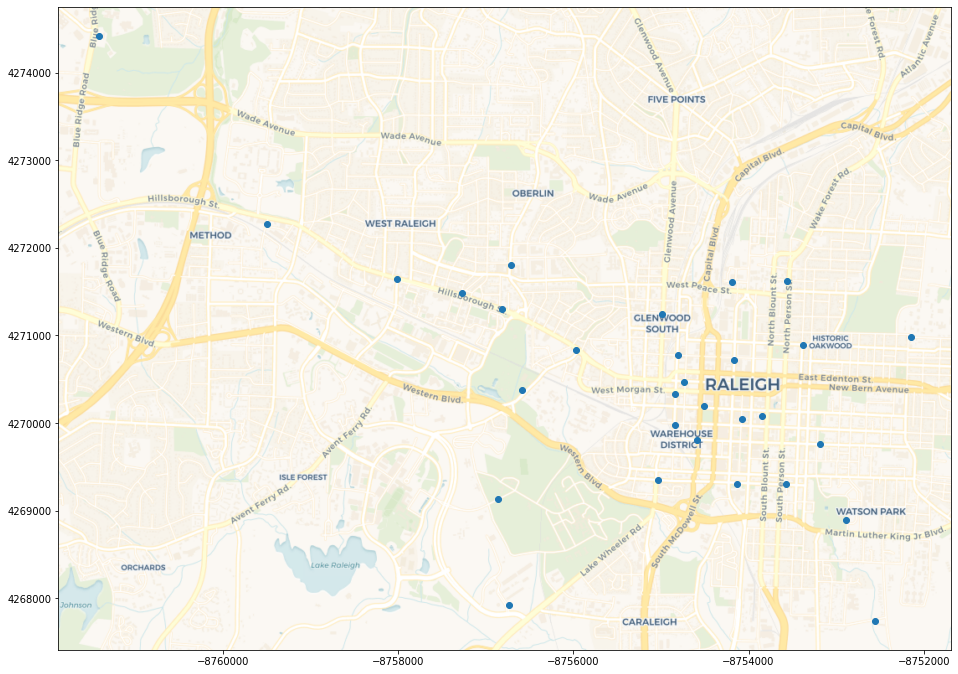

In [24]:
cc_ax1 = cc_docks_reduced_gdf.to_crs(epsg = 3857).plot(figsize = (16,16))
ctx.add_basemap(cc_ax1, url = 'https://a.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}.png')

#### Size maker by column value

In [25]:
cc_docks_reduced_gdf.describe()

primary_locked_cycle_count  stocking_low  total_locked_cycle_count  \
count                   30.000000     30.000000                 30.000000   
mean                     7.600000      2.500000                  7.866667   
std                      4.056498      0.900192                  3.910493   
min                      0.000000      1.000000                  0.000000   
25%                      5.000000      2.000000                  6.000000   
50%                      8.000000      3.000000                  8.000000   
75%                     10.750000      3.000000                 11.500000   
max                     15.000000      4.000000                 15.000000   

       free_spaces  
count    30.000000  
mean      4.866667  
std       0.434172  
min       3.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max       5.000000

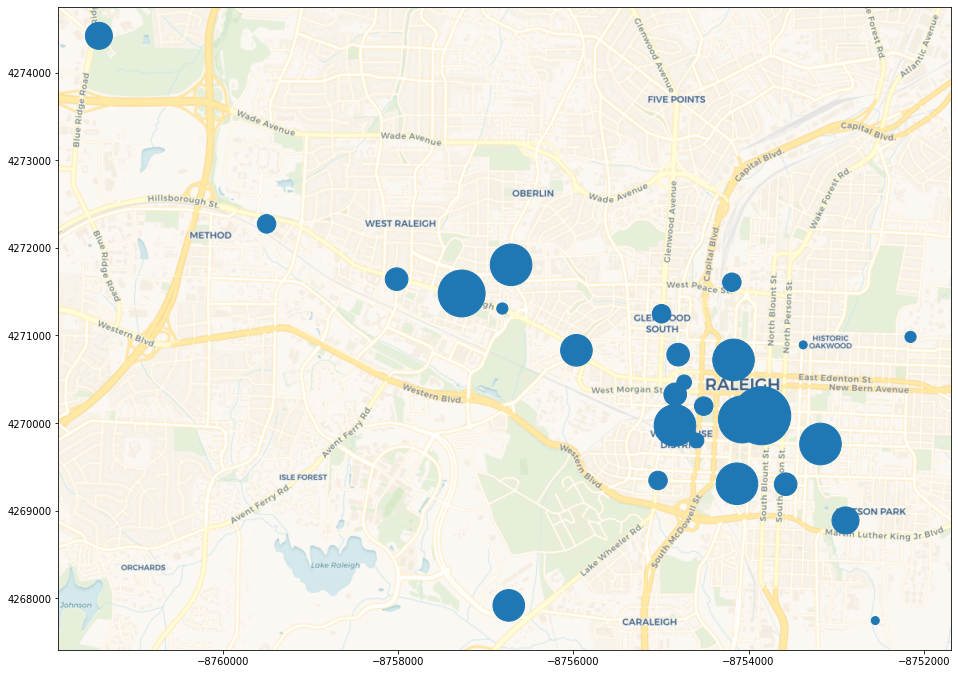

In [26]:
cc_ax2 =cc_docks_reduced_gdf.to_crs(epsg = 3857).plot(markersize = cc_docks_reduced_gdf['total_locked_cycle_count']**3, figsize = (16,16))
ctx.add_basemap(cc_ax2, url = 'https://a.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}.png')

#### Prettier map

[]

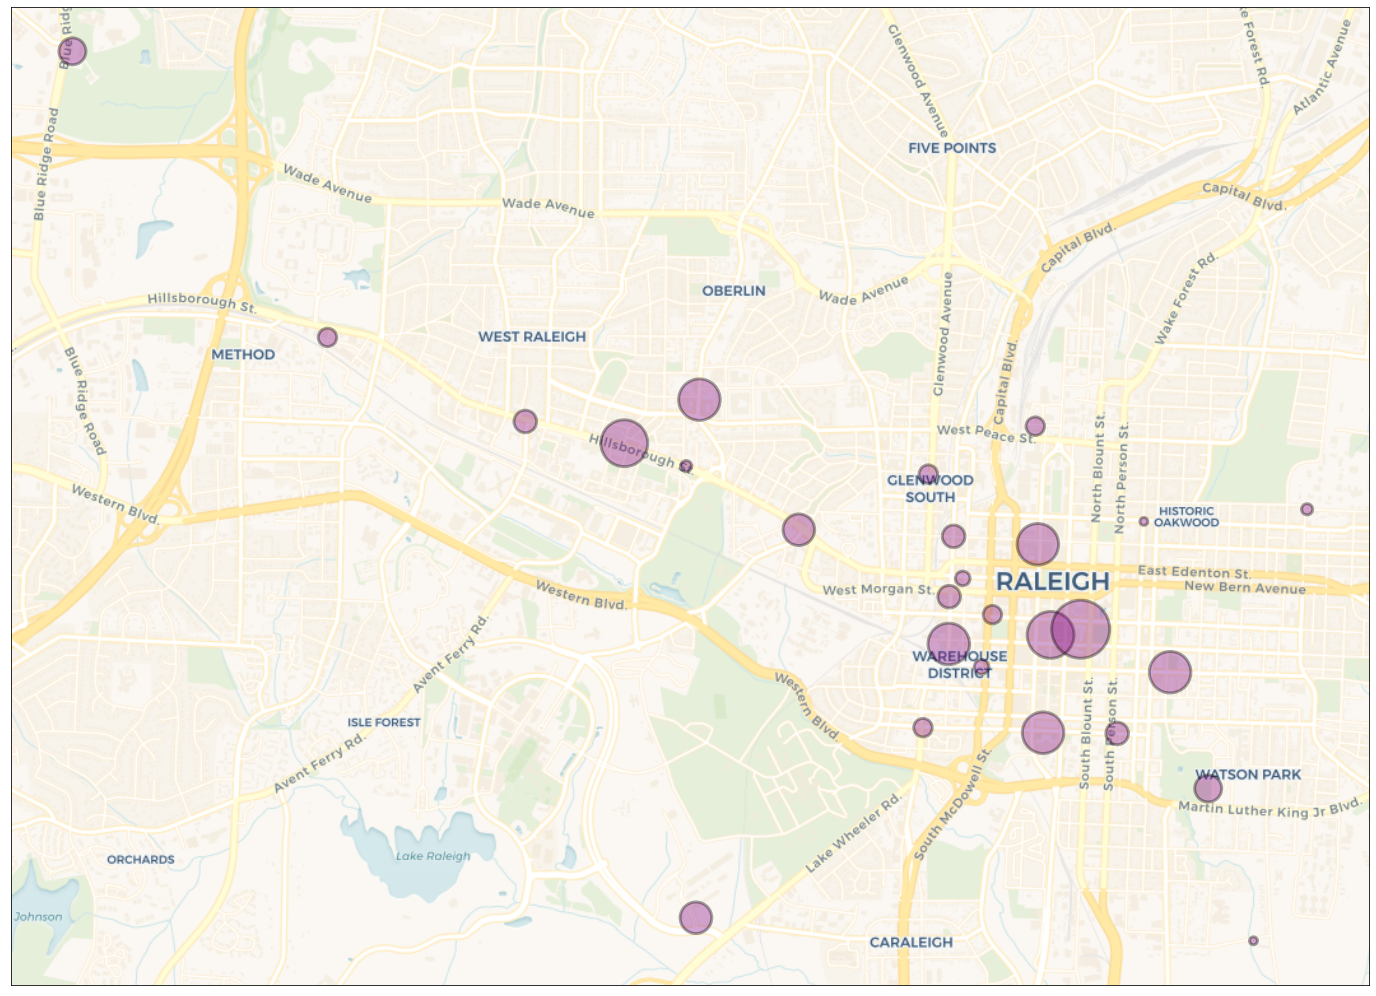

In [27]:
cc_ax3 =cc_docks_reduced_gdf.to_crs(epsg = 3857).plot(
    marker = 'o',
    markersize = cc_docks_reduced_gdf['total_locked_cycle_count']**3,
    color = 'purple',
    edgecolors = 'black',
    linewidths = 3,
    alpha = 0.35,
    figsize = (28,18))
ctx.add_basemap(cc_ax3, url = 'https://a.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}.png')
cc_ax3.axes.get_xaxis().set_visible(False)
cc_ax3.axes.get_yaxis().set_visible(False)
cc_ax3.axes.get_xaxis().set_ticks([])
cc_ax3.axes.get_yaxis().set_ticks([])

### Example: Plotting crime density

#### Access last month of Raleigh building permit data

In [28]:
bp_gdf = gpd.read_file('https://opendata.arcgis.com/datasets/f7a3cbd07e9f4ca5bb6637e7eeab5871_0.geojson')
# bp_gdf = gpd.read_file('./DATA/building_permits_1month.geojson')
bp_gdf.drop(bp_gdf[bp_gdf['geometry'].isna()].index, inplace = True)
bp_gdf.head()

OBJECTID permittypemapped                   workclass permitclass  \
0     53702         Building  New Single Family Dwelling         101   
1    191154         Building               New Building          318   
3    192051         Building                    Addition         437   
4    192052         Building         Alteration/Repairs          437   
5    192189         Building         Alteration/Repairs          320   

                         proposedworkdescription permitclassmapped  \
0                                            SFD       Residential   
1        NEW BLDG/JOHN CHAVIS MEMORIAL PARK PH 1   Non-Residential   
3                  ADDITION TO EXISTING CAROUSEL   Non-Residential   
4                   ALTERATION TO CAROUSEL HOUSE   Non-Residential   
5  ENSCO (ECK) SUPPLY-2539 NOBLIN ROAD-SUITE 106   Non-Residential   

           applieddate           issueddate  estprojectcost  \
0  2017-09-12T04:00:00  2019-10-08T20:44:37       381862.00   
1  2019-09-10T04:00:00  2019-10-07T04:00:00      5659068.00   
3  2019-09-11T04:00:00  2019-10-07T23:36:31        13815.04   
4  2019-09-11T04:00:00  2019-10-07T04:00:00       184123.00   
5  2019-09-10T04:00:00  2019-10-09T04:00:00       392425.00   

  constcompletedofficial  ... streettype  totalsqft  voiddate workclassmapped  \
0                     No  ...       None       4002      None        Existing   
1                     No  ...       None      41601      None        Existing   
3                     No  ...       None        128      None        Existing   
4                     No  ...       None       2343      None        Existing   
5                     No  ...       None       7616      None        Existing   

                               GlobalID         CreationDate  \
0  473ebd18-adec-46aa-ab3e-5f1663e0425c  2018-03-16T01:55:55   
1  a741975d-d9d4-4897-8377-1d1ed52375b3  2018-11-05T23:02:30   
3  84f8523f-94a2-4e1e-af2e-76538ea89c47  2018-12-14T23:02:41   
4  b85be180-2a95-4f24-b5df-727f4a7b027e  2018-12-14T23:02:41   
5  e50df212-7245-4d26-9ca2-dc39d5b62538  2018-12-21T23:02:39   

              EditDate const_type permitnum                    geometry  
0  2019-10-13T22:22:43       V  B    143167  POINT (-78.58197 35.93729)  
1  2019-10-11T22:23:50       None    153524  POINT (-78.62898 35.76943)  
3  2019-10-11T22:23:50       None    154461  POINT (-78.62898 35.76943)  
4  2019-10-11T22:23:50       None    154460  POINT (-78.62898 35.76943)  
5  2019-10-21T22:23:41       II B    154640  POINT (-78.59819 35.80821)  

[5 rows x 84 columns]

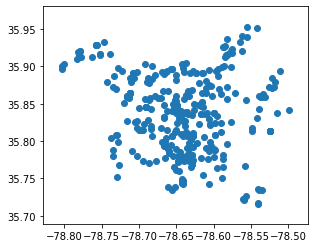

In [29]:
bp_gdf.plot()

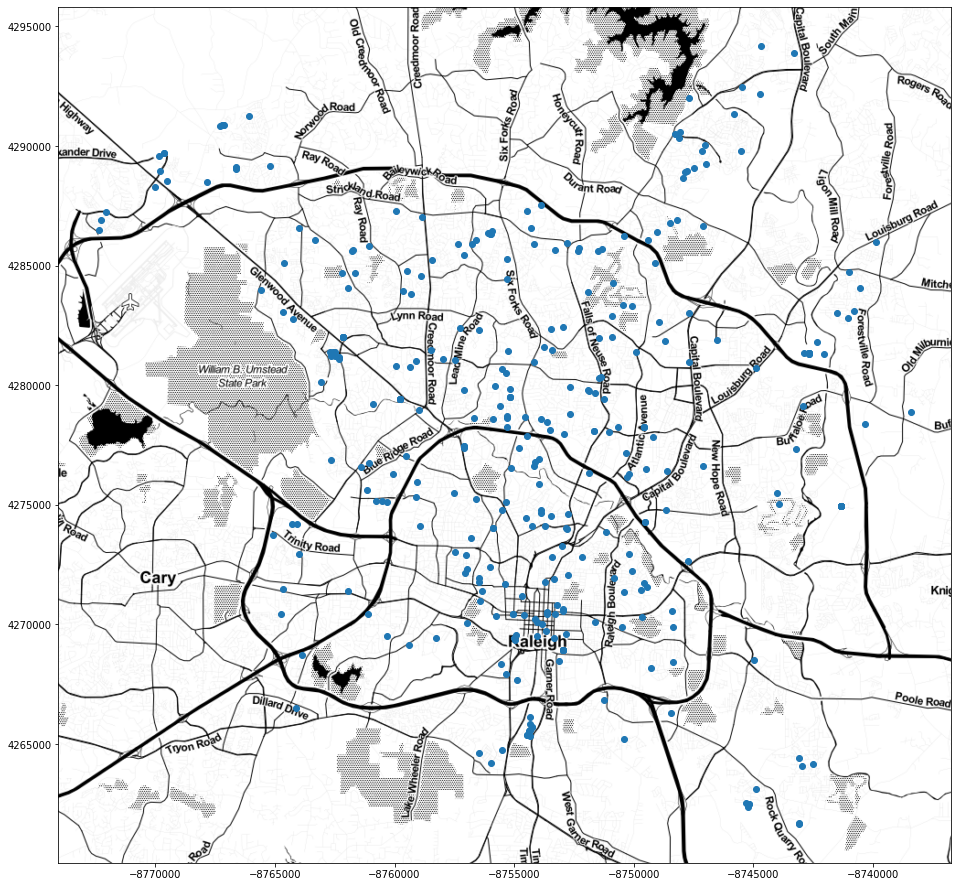

In [30]:
bp_ax1 = bp_gdf.to_crs(epsg = 3857).plot(figsize = (16,16))
ctx.add_basemap(bp_ax1, url = ctx.tile_providers.ST_TONER)

In [31]:
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

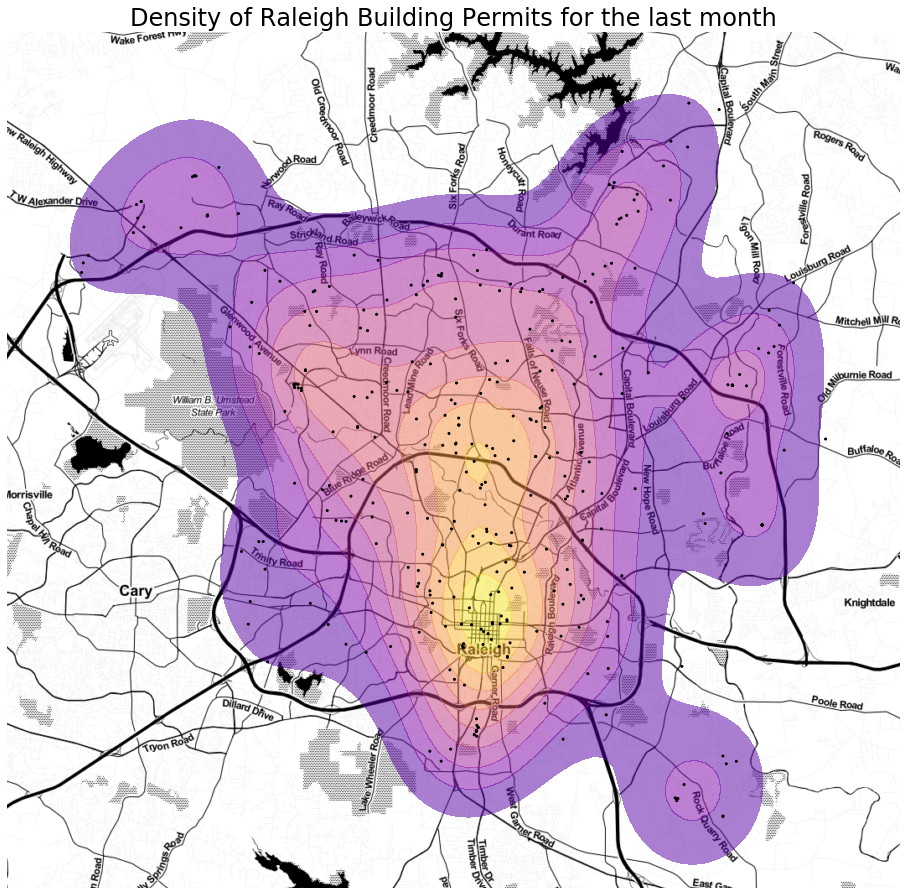

In [32]:
bp_ax2 = gplt.kdeplot(bp_gdf, projection = gcrs.WebMercator(), cmap = 'plasma', shade = True, alpha = 0.5, figsize = (16, 16))
gplt.pointplot(bp_gdf, s = 2, color = 'black', ax = bp_ax2)
gplt.webmap(bp_gdf, provider = 'ST_TONER', ax = bp_ax2)
plt.title("Density of Raleigh Building Permits for the last month", fontsize = 24)
fig = plt.gcf()

## Interactive

### Example: Interactive Choropleth

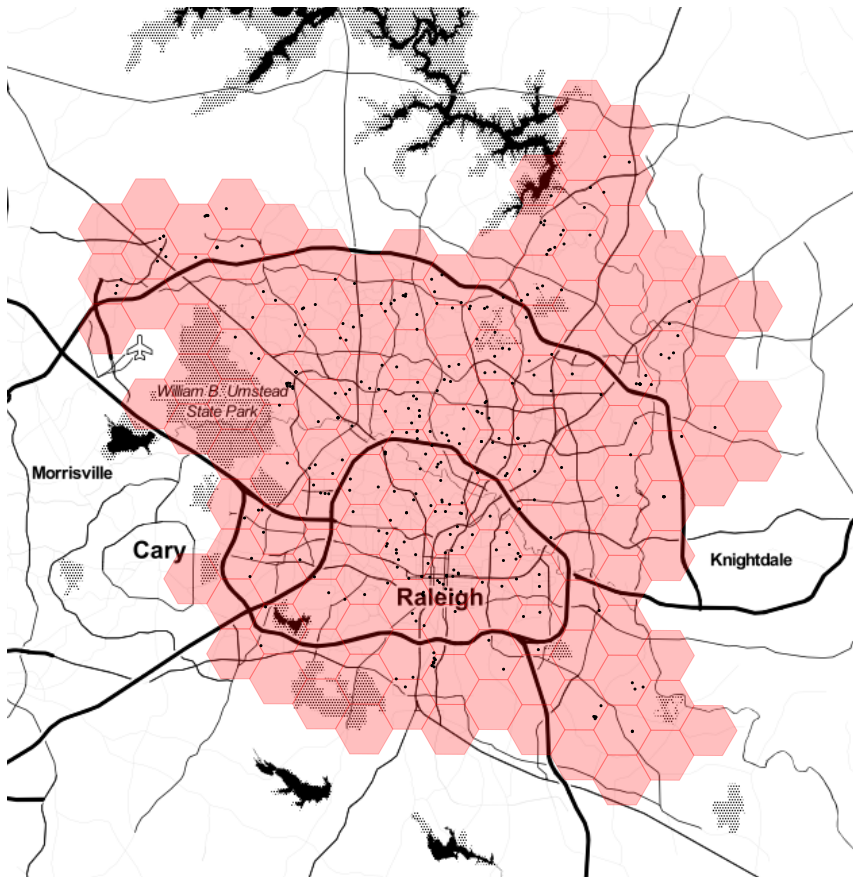

In [53]:
hexgrid_gdf = gpd.read_file('./DATA/hexgrid_polygon_4326.geojson')
hex_ax = gplt.polyplot(hexgrid_gdf, projection = gcrs.WebMercator(), color = 'red', alpha = 0.25, figsize = (16, 16), zorder = 1)
gplt.pointplot(bp_gdf, s = 2, color = 'black', ax = hex_ax, zorder = 2)
gplt.webmap(hexgrid_gdf, provider = 'ST_TONER', ax = hex_ax)

In [64]:
bp_hex_counts_df = gpd.sjoin(hexgrid_gdf, bp_gdf)['hexid'].value_counts().reset_index().rename(columns = {'index': 'hexid', 'hexid': 'bp_count'})
bp_hex_counts_gdf = hexgrid_gdf.merge(bp_hex_counts_df, on = 'hexid')
bp_hex_counts_gdf.head()

hexid                                           geometry  bp_count
0    101  MULTIPOLYGON (((-78.82279 35.90332, -78.81546 ...         3
1    105  MULTIPOLYGON (((-78.80084 35.91358, -78.79350 ...         6
2    111  MULTIPOLYGON (((-78.77893 35.90324, -78.77159 ...         1
3    112  MULTIPOLYGON (((-78.77887 35.92385, -78.77153 ...         4
4    115  MULTIPOLYGON (((-78.75734 35.78988, -78.75001 ...         2

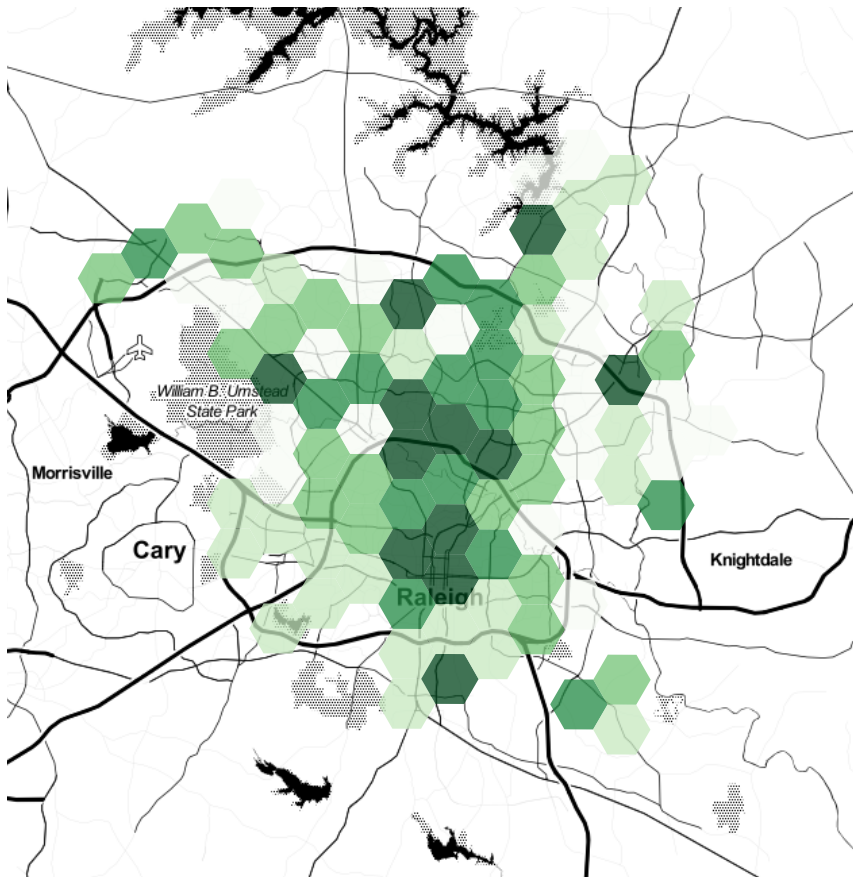

In [72]:
hex_ax2 = gplt.choropleth(bp_hex_counts_gdf, projection = gcrs.WebMercator(), hue = 'bp_count', cmap = 'Greens', scheme = 'Quantiles', alpha = 0.75, figsize = (16, 16), zorder = 1)
gplt.webmap(hexgrid_gdf, provider = 'ST_TONER', ax = hex_ax2)

#### Folium

In [73]:
import folium

In [84]:
m1 = folium.Map(location = [35.779591, -78.638176], zoom_start = 12)
m1

In [95]:
m2 = folium.Map(
    location = [35.779591, -78.638176], 
    zoom_start = 11,
    tiles = 'stamentoner')
folium.Choropleth(
    geo_data = './DATA/hexgrid_polygon_4326.geojson',
    name = 'Building Permit Hexbins',
    data = bp_hex_counts_df,
    columns = ['hexid', 'bp_count'],
    key_on = 'feature.properties.hexid',
    fill_color = 'Greens',
    fill_opacity = 0.75,
    highlight = True,
    nan_fill_opacity = 0,
    nan_fill_color = '#ffffff',
    line_weight = 0,
    control = True
).add_to(m2)

folium.LayerControl().add_to(m2)
m2